In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis(EDA)

In [4]:
df.shape

(614, 13)

The dataset contains 614 rows and 13 columns

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We have one int64, 8 object and 4 float64 data types present in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot:>

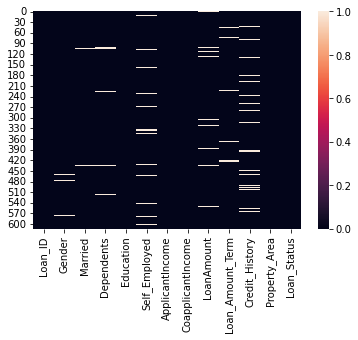

In [7]:
#checking for null values through heatmap and info function
df.info()

sns.heatmap(df.isnull())

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As we can see above we have some null values present in Gender, Married, Dependents, self employed, Loan Amount, Loan Amount Term and Credit History.

We will work on how to deal with these null values.

In [9]:
#Seperating categorical and numerical columns

#checking for categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        cat_col.append(i)
print("Categorical Columns: ",cat_col)
print('\n')

#checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print("Numerical Columns: ",num_col)
print('\n')

Categorical Columns:  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numerical Columns:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']




In [10]:
#checking the nunique values in all columns
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

We can see above that the Loan_ID is unique for all the customers hence we can drop this from the dataset.

In [11]:
df.drop(['Loan_ID'],axis=1, inplace=True)

In [12]:
# Verifying if if the Loan_ID column is dropped 
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
# checking all the unique values present in all columns
for i in df.columns:
    x = df[i].value_counts()
    print("\nColumn name is:",i,"and it value is:\n",x)


Column name is: Gender and it value is:
 Male      489
Female    112
Name: Gender, dtype: int64

Column name is: Married and it value is:
 Yes    398
No     213
Name: Married, dtype: int64

Column name is: Dependents and it value is:
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Column name is: Education and it value is:
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Column name is: Self_Employed and it value is:
 No     500
Yes     82
Name: Self_Employed, dtype: int64

Column name is: ApplicantIncome and it value is:
 2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

Column name is: CoapplicantIncome and it value is:
 0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

Colu

Treating the null values

In [14]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# let's check the mode of the columns that has missing data except for LoanAmount to fill the null values 
# we will fill the null values using its mode
print("The mode of Gender is:",df["Gender"].mode())  
print("The mode of Married is:",df["Married"].mode())
print("The mode of Dependents is:",df["Dependents"].mode())
print("The mode of  Self_Employed  is:",df["Self_Employed"].mode())
print("The mode of Credit_History  is:",df["Credit_History"].mode())
print("The mode of Loan_Amount_Term is:",df["Loan_Amount_Term"].mode())

The mode of Gender is: 0    Male
Name: Gender, dtype: object
The mode of Married is: 0    Yes
Name: Married, dtype: object
The mode of Dependents is: 0    0
Name: Dependents, dtype: object
The mode of  Self_Employed  is: 0    No
Name: Self_Employed, dtype: object
The mode of Credit_History  is: 0    1.0
Name: Credit_History, dtype: float64
The mode of Loan_Amount_Term is: 0    360.0
Name: Loan_Amount_Term, dtype: float64


In [16]:
# Filling the missing values in Gender by its mode Male
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

# Filling the missing values in Married by its mode Yes
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

# Filling the missing values  by its mode 0
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

# Filling the missing values  by its mode No
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

# Filling the missing values  by its mode No
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

# Filling the missing values by its mode 360
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [17]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

As we can see that the null values are treated for all columns except for Loan Amount.

In [18]:
print("The Mean of LoanAmount is:",df["LoanAmount"].mean()) 
print("The Median of LoanAmount is:",df["LoanAmount"].median()) 
print("The Mode of LoanAmount is:",df["LoanAmount"].mode()) 

The Mean of LoanAmount is: 146.41216216216216
The Median of LoanAmount is: 128.0
The Mode of LoanAmount is: 0    120.0
Name: LoanAmount, dtype: float64


We can see the mean median and mode of Loan Amount column. We can choose any one value to fill the null values. Lets select the Median to fill the null values.

In [19]:
# Filling the missing values in LoanAmount by its Median 128
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

In [20]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

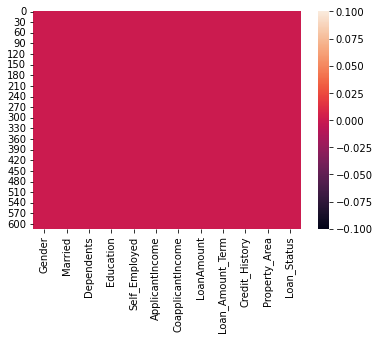

In [21]:
sns.heatmap(df.isnull())

As we can see above the null values are treated.

In [22]:
# Checking the uniqueness of Loan_Status
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

Y and N are the unique values present in our target column

In [23]:
# Checking the list of counts in Loan_Status
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Here we can see that the value counts of N is less hence we are dealing with imbalanced dataset

In [24]:
# Checking wheather the dataset contains any space
df.loc[df['Loan_Status']==" "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


As we can see there are no spaces too so hence the null values are treated.

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


Here we can see the statistical values of numerical columns.

In [26]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,614,2,Male,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,614,2,Yes,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,614,4,0,360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,614,2,No,532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,NaN,NaN,NaN,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,NaN,NaN,NaN,342.410423,64.428629,12.0,360.0,360.0,360.0,480.0
Credit_History,614.0,NaN,NaN,NaN,0.855049,0.352339,0.0,1.0,1.0,1.0,1.0


Here We can see the all the columns statistical values.

Observations:

The Mean and Median(50%) for ApplicantIncome, CoapplicantIncome, LoanAmount and Loan_Amount_Term are differing from each other. Which means there is a little skewness present in them.
The 75% and Max values also have a difference. Which means there are some outliers present in our data.
The STD for ApplicantIncome and CoapplicantIncome is high. Which means the data is wide spread.

# Data Visualization

Y    422
N    192
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

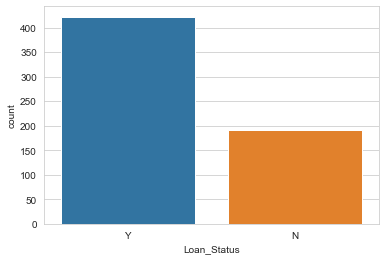

In [27]:
print(df['Loan_Status'].value_counts())
sns.set_style("whitegrid")
sns.countplot(x='Loan_Status',data=df)

The data is imbalanced.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

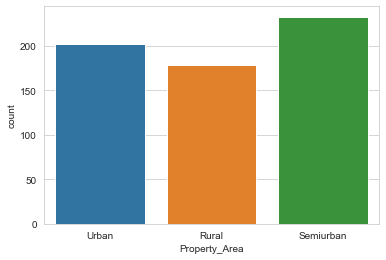

In [28]:
print(df['Property_Area'].value_counts())
sns.countplot(x='Property_Area',data=df)

1.0    525
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

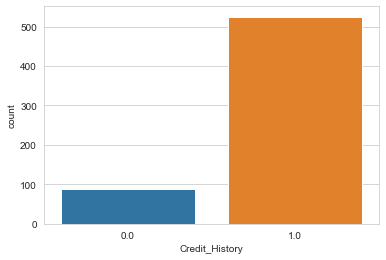

In [29]:
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=df)

Majority of the applicants have a good credit history.

No     532
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

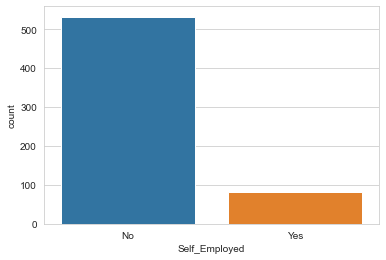

In [30]:
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

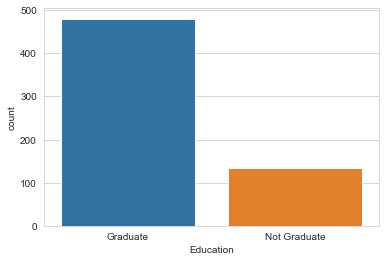

In [31]:
print(df['Education'].value_counts())
sns.countplot(x='Education',data=df)

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

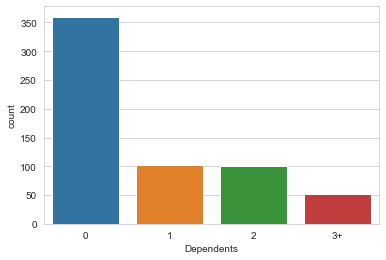

In [32]:
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df)

Here we can see that majority of the applicants do not have dependents. A very less number of applicants have 3+ dependents.

Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

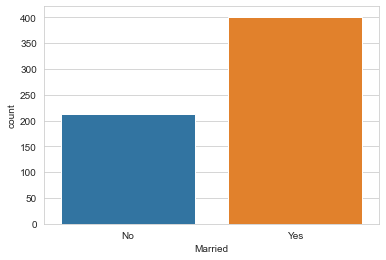

In [33]:
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df)

Here we can see that majority of the applicants are married.

Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

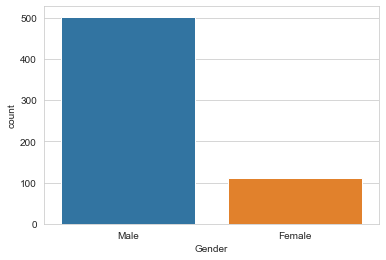

In [34]:
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df)

Here we can see that majority of applicants are male.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

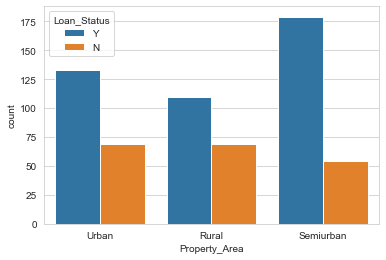

In [35]:
sns.countplot(x='Property_Area',data=df, hue='Loan_Status')

As we can see above the chances for the loan approval is more when the property is in Semiurban Area.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

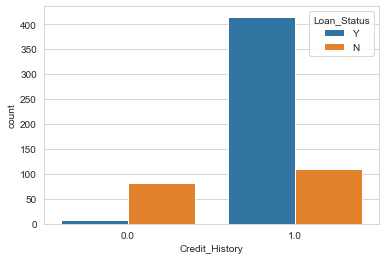

In [37]:
sns.countplot(x='Credit_History',data=df,hue='Loan_Status')

As we can see its obvious the chances of loan approval is more when the applicant has a good credit history.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

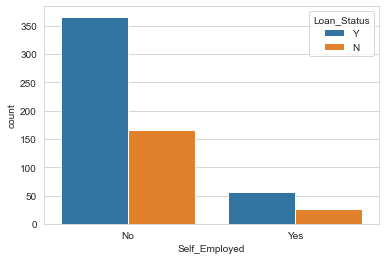

In [38]:
sns.countplot(x='Self_Employed',data=df,hue='Loan_Status')

As we can see above the applicants who are not self employed have more chance of getting the loan approved.

<AxesSubplot:xlabel='Education', ylabel='count'>

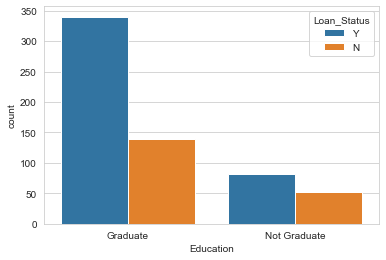

In [39]:
sns.countplot(x='Education',data=df,hue='Loan_Status')

As we can see above the applicants who are graduates have more chances of the loan getting approved.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

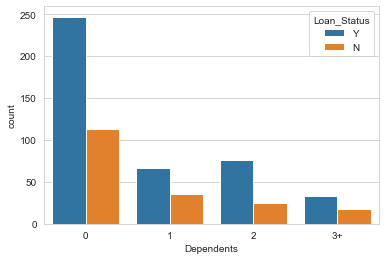

In [40]:
sns.countplot(x='Dependents',data=df, hue='Loan_Status')

As we can see above the applocants with no dependents have more chances of loan approval

<AxesSubplot:xlabel='Married', ylabel='count'>

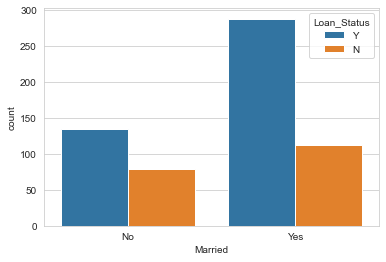

In [41]:
sns.countplot(x='Married',data=df,hue='Loan_Status')

As we can see above the applicants that are married have more chance of loan approvals. This can be because married people will have coapplicants as well.

<AxesSubplot:title={'center':'Comparision between ApplicantIncome and LoanAmount'}, xlabel='ApplicantIncome', ylabel='LoanAmount'>

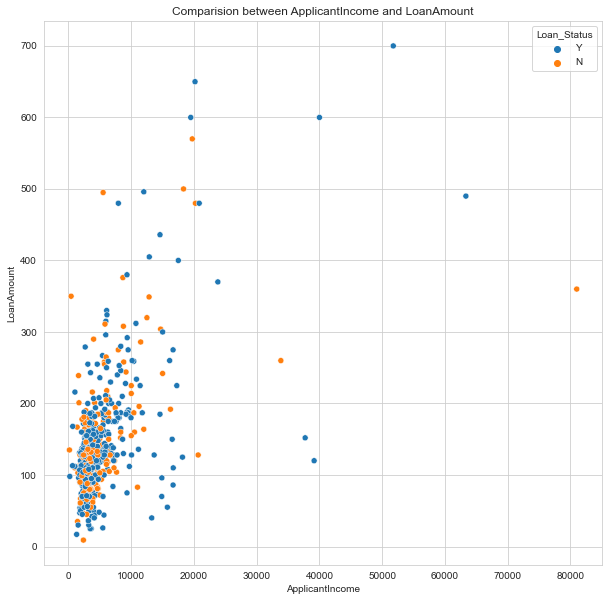

In [42]:
plt.figure(figsize=[10,10])
plt.title('Comparision between ApplicantIncome and LoanAmount')
sns.scatterplot(df['ApplicantIncome'],df['LoanAmount'],hue=df['Loan_Status'])

As we can see above, there is a high density of points in the range of 0-2000 for ApplicantIncome, and 0-300 for loan amount which means if Applicants income is in the range of 0-2000 then the loan amount will be approved in the range 0-300.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

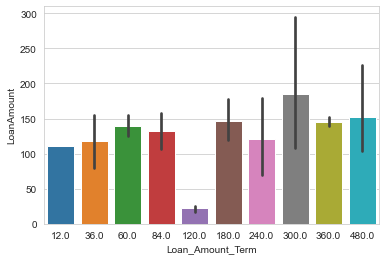

In [43]:
sns.barplot(x='Loan_Amount_Term',data=df,y="LoanAmount")

As we can see above, the loan amount term 300.0 is high with loan amount compared to others.

sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status')

Here we can see the relationship between the applicant income and loan amount. Their is a linear relationship between them.

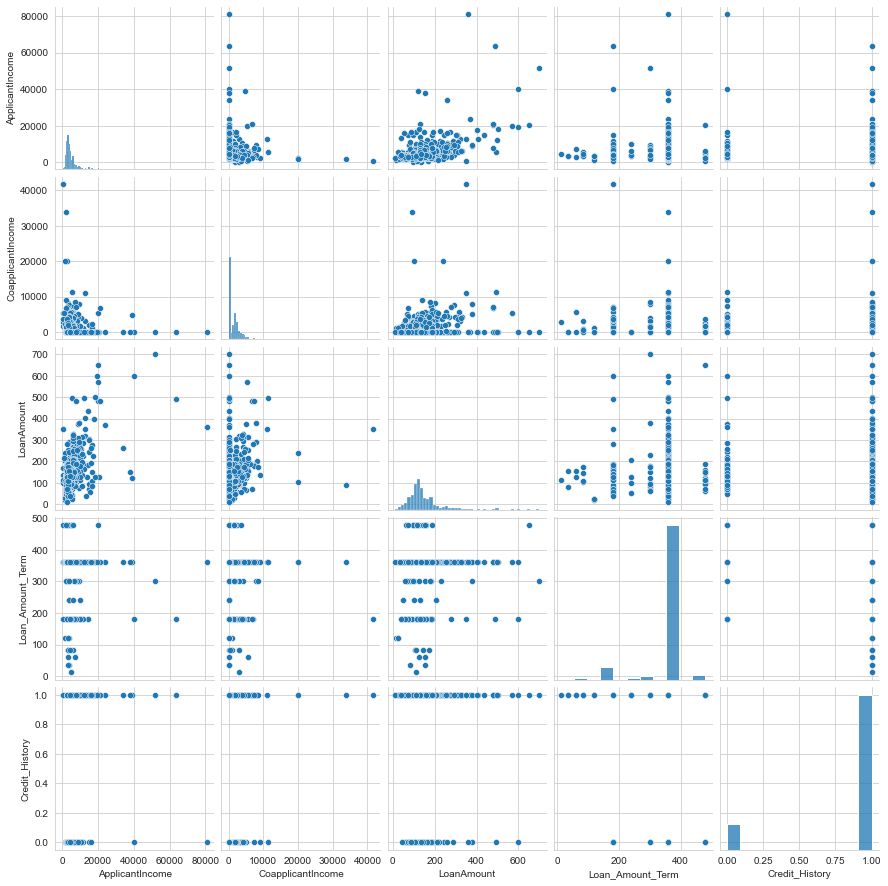

In [44]:
sns.pairplot(df)
plt.show()

In [45]:
#checking for categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        cat_col.append(i)
print("Categorical Columns: ",cat_col)
print('\n')

#checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print("Numerical Columns: ",num_col)
print('\n')

Categorical Columns:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numerical Columns:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']




# Checking for outliers

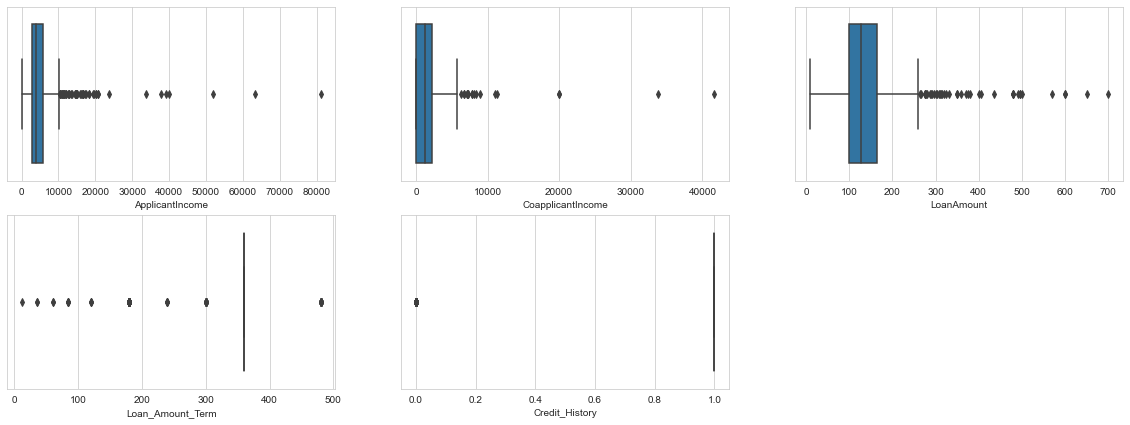

In [46]:
plt.figure(figsize=(20,30))
for i in enumerate(num_col):
    plt.subplot(8,3,i[0]+1)
    sns.boxplot(df[i[1]])

As we can see above there are some outliers present in the numerical columns. We will be treating them.

Removing outliers

z score

In [47]:
#Splitting the data to remove outliers
x= df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',]]
print(x.shape)

(614, 5)


In [48]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,0.554487,0.211241,0.273231,0.411733
1,0.134412,0.038732,0.211241,0.273231,0.411733
2,0.393747,0.554487,0.948996,0.273231,0.411733
3,0.462062,0.251980,0.306435,0.273231,0.411733
4,0.097728,0.554487,0.056551,0.273231,0.411733
...,...,...,...,...,...
609,0.410130,0.554487,0.889500,0.273231,0.411733
610,0.212557,0.554487,1.258378,2.522836,0.411733
611,0.437174,0.472404,1.276168,0.273231,0.411733
612,0.357064,0.554487,0.490816,0.273231,0.411733


In [49]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
       2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
      dtype=int64))


In [50]:
z.iloc[9][1]

3.196712546212882

In [51]:
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(614, 12)
(577, 12)


In [52]:
# Data loss percentage using zscore method
a=((614-577)/614)*100
a

6.026058631921824

IQR Method

In [53]:
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR=Q3-Q1
df2=x[~((x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(396, 5)

In [54]:
# Data loss percentage using IQR method
b=((614-396)/614)*100
b

35.50488599348534

The Data loss percentage is 6.02% using zscore and 35.5% using IQR. Only 10% of data loss is acceptable. Hence i am selecting zscore method.

In [55]:
df=df1
df.shape

(577, 12)

Checking for skewness

In [56]:
x= df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',]]
print(x.shape)
x.skew()

(577, 5)


ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

Before removing skewness


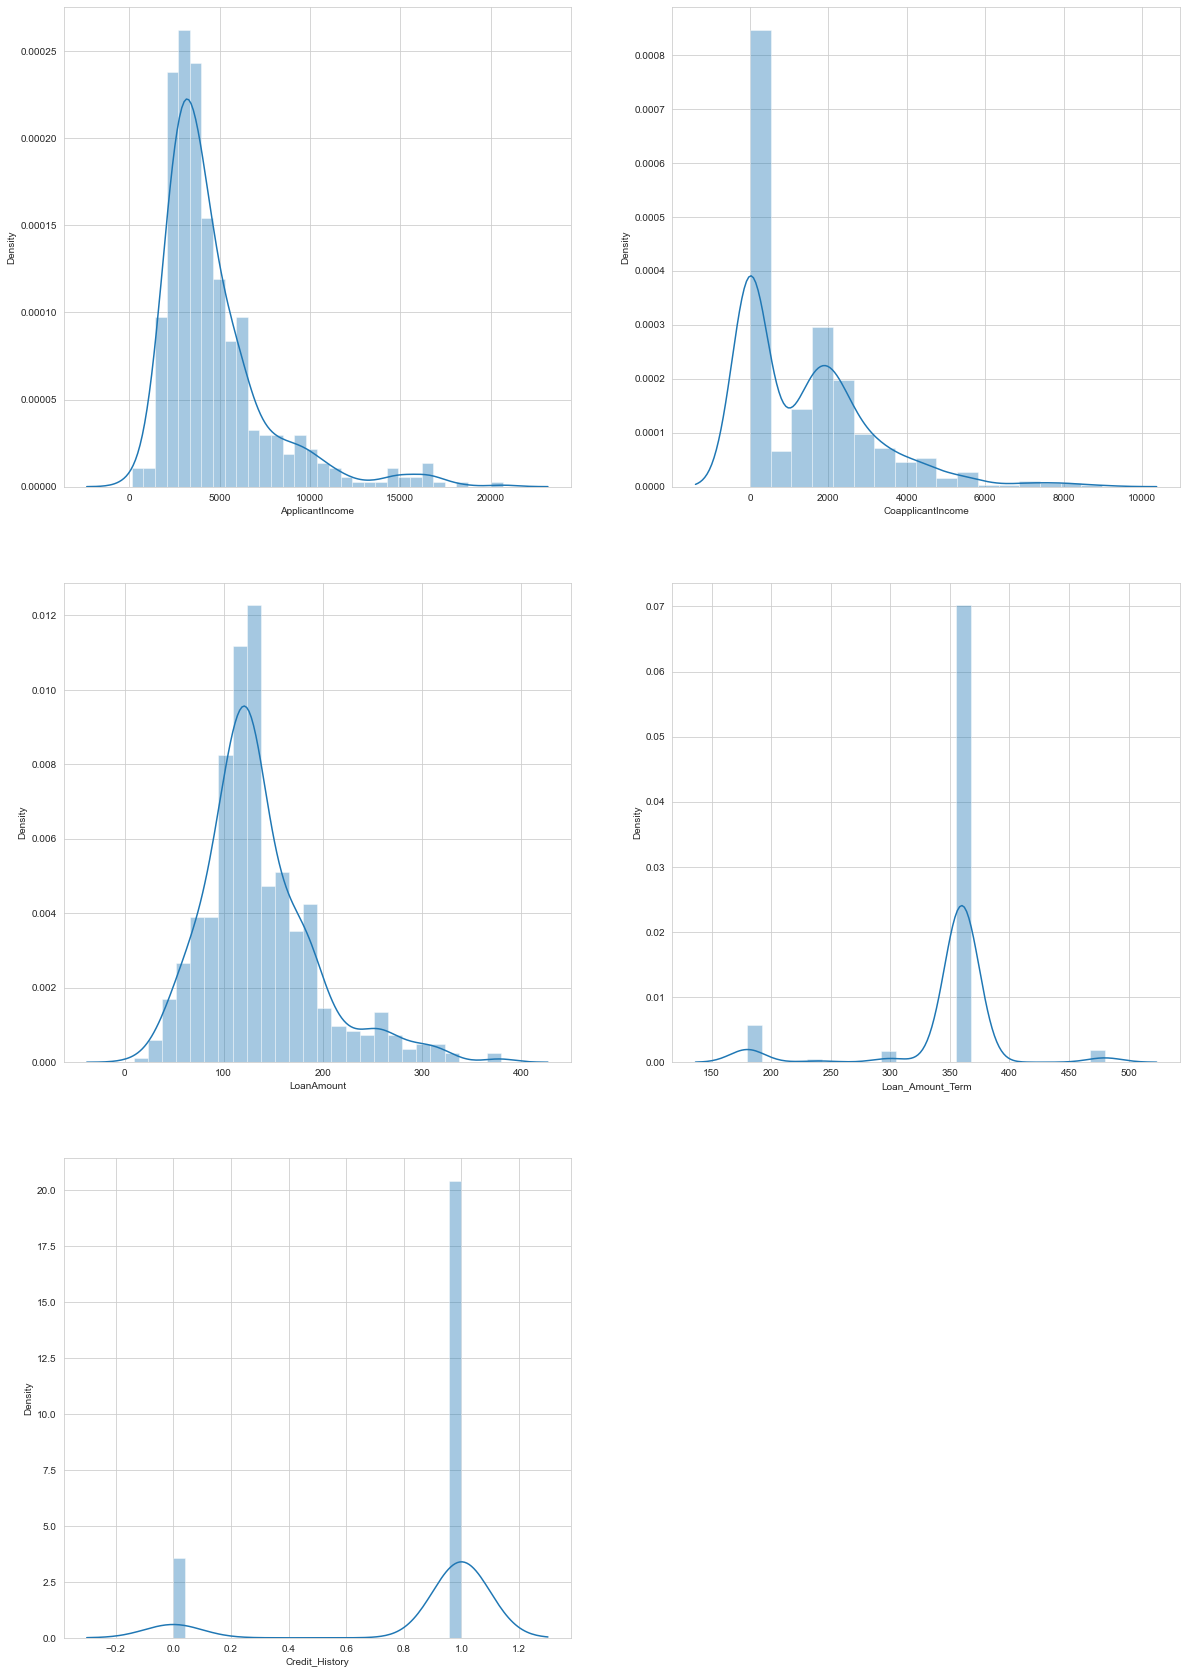

In [57]:
print('Before removing skewness')
Number_Col=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
plt.figure(figsize=(20,30))
for i in enumerate(Number_Col):
    plt.subplot(3,2,i[0]+1)
    sns.distplot(df[i[1]])
plt.show()

As we can see there is skewness present in all the numerical columns. But the columns Loan_Amount_term and credit history are categorical columns. So we will work on the skewness of ApplicantIncome, CoapplicantIncome and LoanAmount.

Removing skewness

In [58]:
# using power transform method
from sklearn.preprocessing import power_transform
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]=power_transform(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']],method='yeo-johnson')


After removing skewness


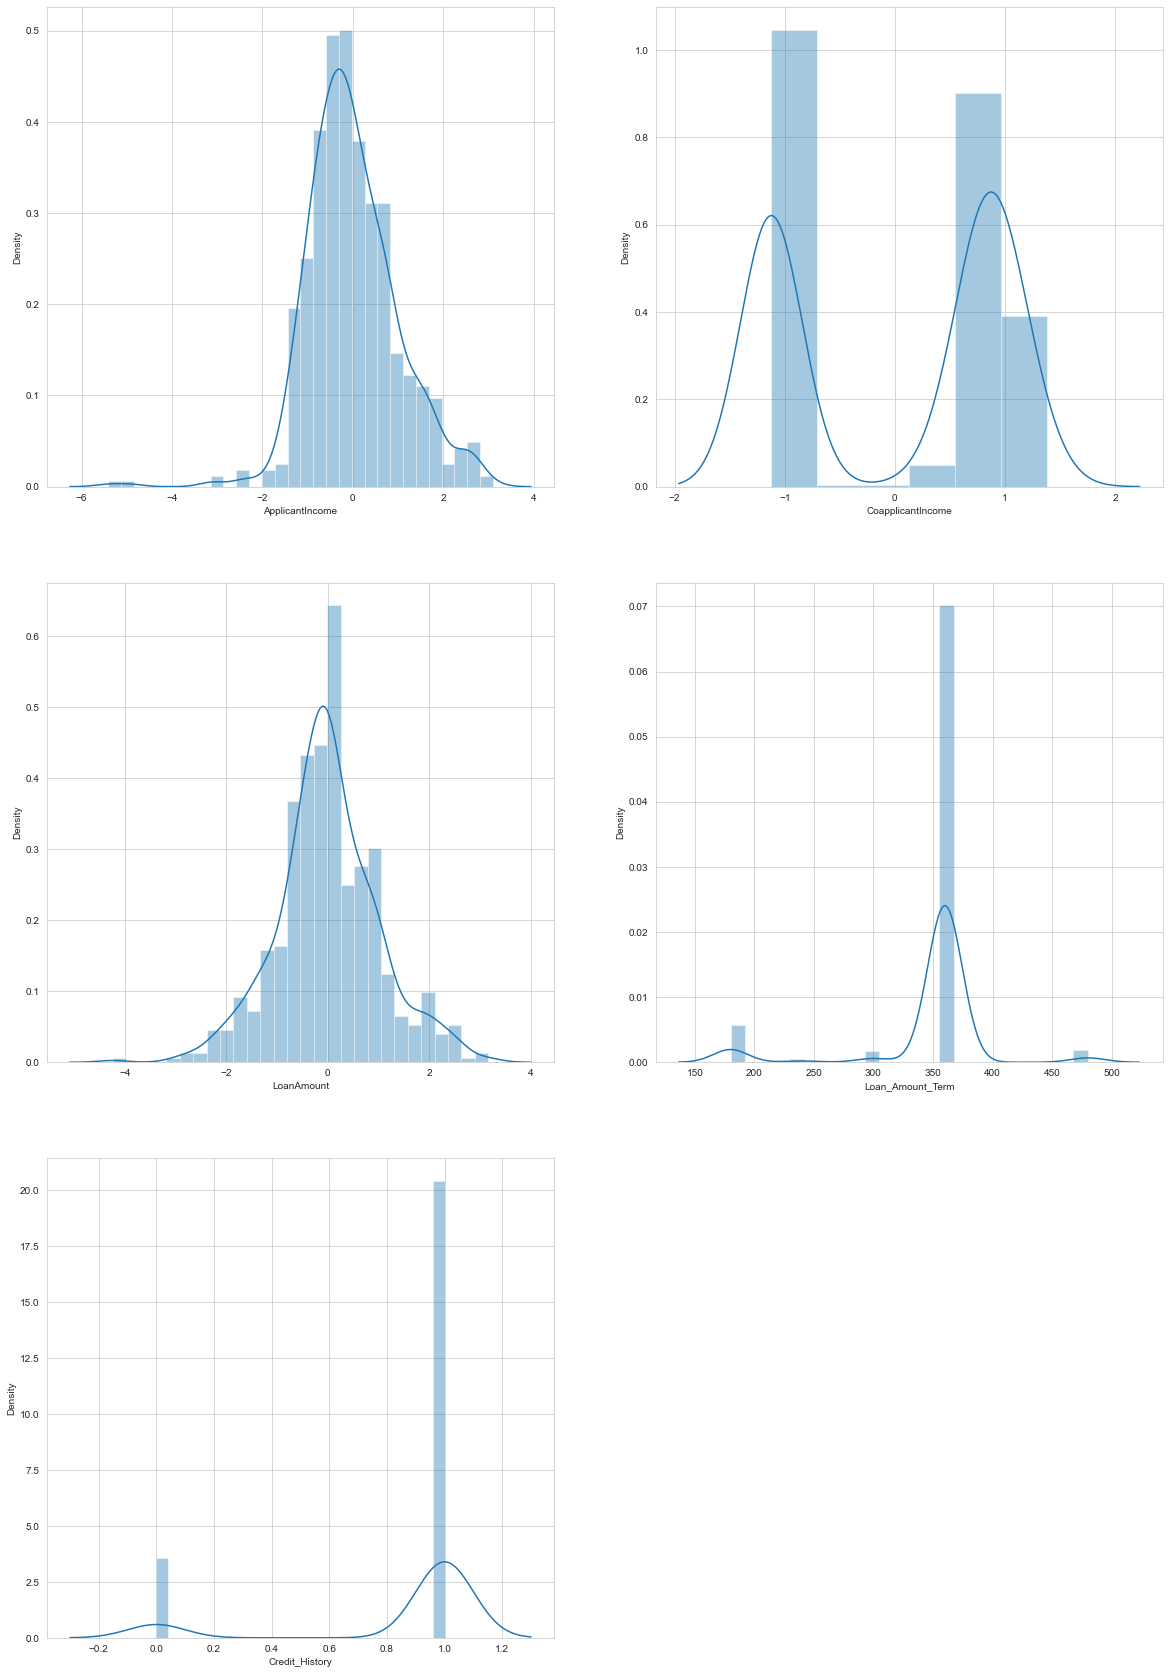

In [59]:
print('After removing skewness')
Number_Col=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
plt.figure(figsize=(20,30))
for i in enumerate(Number_Col):
    plt.subplot(3,2,i[0]+1)
    sns.distplot(df[i[1]])
plt.show()

In [60]:
x= df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
x.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
dtype: float64

Encoding the Categorical columns to Numerical columns

In [61]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,0.681780,-1.122446,0.000771,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.234783,0.744117,0.000771,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,-0.527201,-1.122446,-1.437336,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,-0.791972,0.895786,-0.153545,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.728848,-1.122446,0.238260,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,-0.587375,-1.122446,-1.293791,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,0.035386,-1.122446,-2.332692,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,1.281658,0.173344,1.845015,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,1.164426,-1.122446,0.976055,360.0,1.0,2.0,1.0


Correlation between variables

In [62]:
dfcor=df.corr()
dfcor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


<AxesSubplot:>

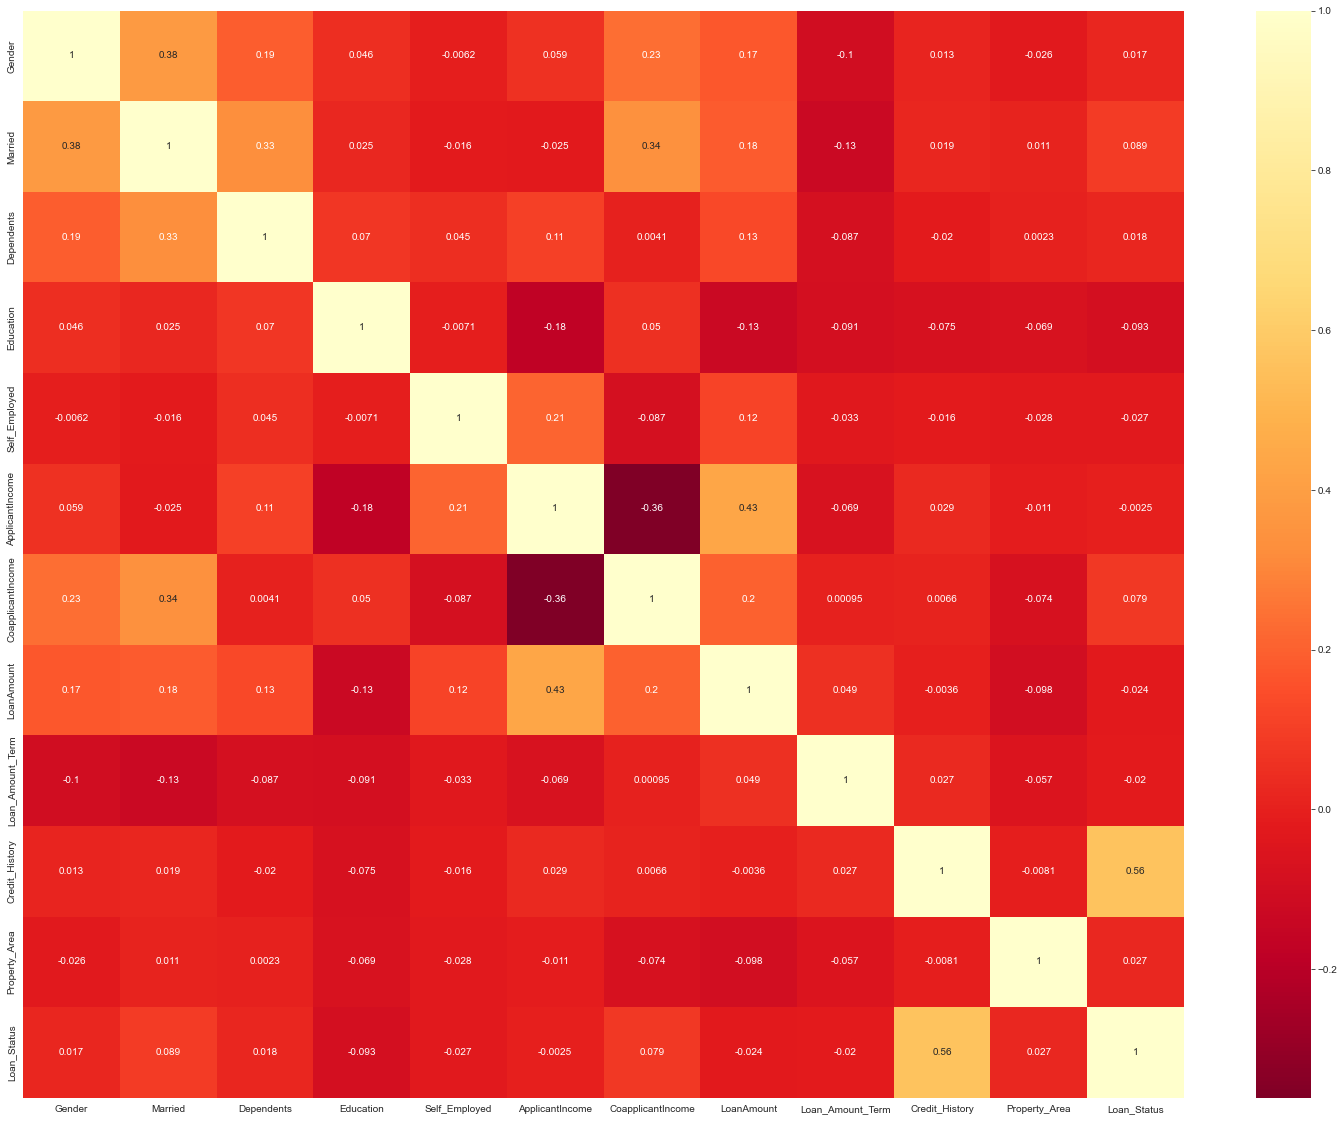

In [63]:
plt.figure(figsize=(26,20))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

Observations:

The Credit_history is positively correlated to our target variable Loan Status.
The other features have very less correlation with our target variable.
The Applicant Income and CoapplicantIncome has a less negative correlation among them.
There will be no multicollinearity issue in our dataset but lets check it out through VIF method.

Checking Multicolinearity

In [64]:
#Splitting the data
x= df.drop(['Loan_Status'], axis=1)
x.shape

(577, 11)

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["faetures"]=x.columns
    print(vif)

In [66]:
vif_calc()

    VIF Factor           faetures
0     6.117335             Gender
1     3.942841            Married
2     1.777192         Dependents
3     1.349763          Education
4     1.197147      Self_Employed
5     1.754683    ApplicantIncome
6     1.584755  CoapplicantIncome
7     1.540851         LoanAmount
8    10.411435   Loan_Amount_Term
9     6.276583     Credit_History
10    2.650525      Property_Area


As we can see above the VIF Values are less. There is no Multicollinearity between the features.

# Feature Scaling using Standard Scaler

In [67]:
#Splitting the data
x= df.drop(['Loan_Status'], axis=1)
y= df['Loan_Status']
print(x.shape)
print(y.shape)

(577, 11)
(577,)


In [68]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
xResampling using SMOTE

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.230853,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.230853,0.418513,1.227472


Resampling using SMOTE

In [69]:
print(y.value_counts())

1.0    398
0.0    179
Name: Loan_Status, dtype: int64


As we can see the data is imbalanced lets use SMOTE technique to balance our dataset.

In [70]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [71]:
y.value_counts()

1.0    398
0.0    398
Name: Loan_Status, dtype: int64

Now our dataset is balanced

# Model

Finding the best random state

In [72]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [75]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    RF = RandomForestClassifier()
    RF.fit(x_train,y_train)
    pred=RF.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best Accuracy is ",maxAccu," At random state ",maxRS)

Best Accuracy is  0.89375  At random state  112


Spliting Train and Test Data

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(636, 11)
(160, 11)
(636,)
(160,)


# Finding the best Model

In [77]:
# Importing necessary Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

1. Gaussian Naive Bayes

In [78]:
GNB=GaussianNB()
GNB.fit(x_train,y_train)
predGNB=GNB.predict(x_test)
print(accuracy_score(y_test,predGNB))
print(confusion_matrix(y_test,predGNB))
print(classification_report(y_test,predGNB))
print("Training accuracy::",GNB.score(x_train,y_train))
print("Test accuracy::",GNB.score(x_test,y_test))

0.74375
[[34 40]
 [ 1 85]]
              precision    recall  f1-score   support

         0.0       0.97      0.46      0.62        74
         1.0       0.68      0.99      0.81        86

    accuracy                           0.74       160
   macro avg       0.83      0.72      0.71       160
weighted avg       0.81      0.74      0.72       160

Training accuracy:: 0.6949685534591195
Test accuracy:: 0.74375


2. Decision Tree Classifier

In [79]:
print('DTC for Gini')
DTC1=DecisionTreeClassifier(criterion='gini')
DTC1.fit(x_train,y_train)
predDTC1=DTC1.predict(x_test)
print(accuracy_score(y_test,predDTC1))
print(confusion_matrix(y_test,predDTC1))
print(classification_report(y_test,predDTC1))
print("Training accuracy::",DTC1.score(x_train,y_train))
print("Test accuracy::",DTC1.score(x_test,y_test))
print('\n')

print('DTC for Entropy')
DTC2=DecisionTreeClassifier(criterion='entropy')
DTC2.fit(x_train,y_train)
predDTC2=DTC2.predict(x_test)
print(accuracy_score(y_test,predDTC2))
print(confusion_matrix(y_test,predDTC2))
print(classification_report(y_test,predDTC2))
print("Training accuracy::",DTC2.score(x_train,y_train))
print("Test accuracy::",DTC2.score(x_test,y_test))

DTC for Gini
0.70625
[[61 13]
 [34 52]]
              precision    recall  f1-score   support

         0.0       0.64      0.82      0.72        74
         1.0       0.80      0.60      0.69        86

    accuracy                           0.71       160
   macro avg       0.72      0.71      0.71       160
weighted avg       0.73      0.71      0.70       160

Training accuracy:: 1.0
Test accuracy:: 0.70625


DTC for Entropy
0.7375
[[59 15]
 [27 59]]
              precision    recall  f1-score   support

         0.0       0.69      0.80      0.74        74
         1.0       0.80      0.69      0.74        86

    accuracy                           0.74       160
   macro avg       0.74      0.74      0.74       160
weighted avg       0.75      0.74      0.74       160

Training accuracy:: 1.0
Test accuracy:: 0.7375


In [80]:
DTC=DecisionTreeClassifier(criterion='gini')
DTC.fit(x_train,y_train)
predDTC=DTC.predict(x_test)
print(accuracy_score(y_test,predDTC))
print(confusion_matrix(y_test,predDTC))
print(classification_report(y_test,predDTC))
print("Training accuracy::",DTC.score(x_train,y_train))
print("Test accuracy::",DTC.score(x_test,y_test))

0.725
[[61 13]
 [31 55]]
              precision    recall  f1-score   support

         0.0       0.66      0.82      0.73        74
         1.0       0.81      0.64      0.71        86

    accuracy                           0.73       160
   macro avg       0.74      0.73      0.72       160
weighted avg       0.74      0.72      0.72       160

Training accuracy:: 1.0
Test accuracy:: 0.725


3. KNeighbors Classifier

In [81]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))
print("Training accuracy::",KNN.score(x_train,y_train))
print("Test accuracy::",KNN.score(x_test,y_test))

0.78125
[[64 10]
 [25 61]]
              precision    recall  f1-score   support

         0.0       0.72      0.86      0.79        74
         1.0       0.86      0.71      0.78        86

    accuracy                           0.78       160
   macro avg       0.79      0.79      0.78       160
weighted avg       0.79      0.78      0.78       160

Training accuracy:: 0.8427672955974843
Test accuracy:: 0.78125


4. Support Vector Classifier

In [82]:
print('SV for rbf')
SV1=SVC(kernel='rbf')
SV1.fit(x_train,y_train)
predSV1=SV1.predict(x_test)
print(accuracy_score(y_test,predSV1))
print(confusion_matrix(y_test,predSV1))
print(classification_report(y_test,predSV1))
print("Training accuracy::",SV1.score(x_train,y_train))
print("Test accuracy::",SV1.score(x_test,y_test))
print('\n')

print('SV for poly')
SV2=SVC(kernel='poly')
SV2.fit(x_train,y_train)
predSV2=SV2.predict(x_test)
print(accuracy_score(y_test,predSV2))
print(confusion_matrix(y_test,predSV2))
print(classification_report(y_test,predSV2))
print("Training accuracy::",SV2.score(x_train,y_train))
print("Test accuracy::",SV2.score(x_test,y_test))
print('\n')

print('SV for linear')
SV3=SVC(kernel='linear')
SV3.fit(x_train,y_train)
predSV3=SV3.predict(x_test)
print(accuracy_score(y_test,predSV3))
print(confusion_matrix(y_test,predSV3))
print(classification_report(y_test,predSV3))
print("Training accuracy::",SV3.score(x_train,y_train))
print("Test accuracy::",SV3.score(x_test,y_test))


SV for rbf
0.76875
[[53 21]
 [16 70]]
              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74        74
         1.0       0.77      0.81      0.79        86

    accuracy                           0.77       160
   macro avg       0.77      0.77      0.77       160
weighted avg       0.77      0.77      0.77       160

Training accuracy:: 0.800314465408805
Test accuracy:: 0.76875


SV for poly
0.775
[[49 25]
 [11 75]]
              precision    recall  f1-score   support

         0.0       0.82      0.66      0.73        74
         1.0       0.75      0.87      0.81        86

    accuracy                           0.78       160
   macro avg       0.78      0.77      0.77       160
weighted avg       0.78      0.78      0.77       160

Training accuracy:: 0.7830188679245284
Test accuracy:: 0.775


SV for linear
0.74375
[[33 41]
 [ 0 86]]
              precision    recall  f1-score   support

         0.0       1.00      0.45      0.62     

In [83]:
SV=SVC(kernel='linear')
SV.fit(x_train,y_train)
predSV=SV.predict(x_test)
print(accuracy_score(y_test,predSV))
print(confusion_matrix(y_test,predSV))
print(classification_report(y_test,predSV))
print("Training accuracy::",SV.score(x_train,y_train))
print("Test accuracy::",SV.score(x_test,y_test))

0.74375
[[33 41]
 [ 0 86]]
              precision    recall  f1-score   support

         0.0       1.00      0.45      0.62        74
         1.0       0.68      1.00      0.81        86

    accuracy                           0.74       160
   macro avg       0.84      0.72      0.71       160
weighted avg       0.83      0.74      0.72       160

Training accuracy:: 0.6965408805031447
Test accuracy:: 0.74375


5. Random Forest Classifier

In [84]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
predRF=RF.predict(x_test)
print(accuracy_score(y_test,predRF))
print(confusion_matrix(y_test,predRF))
print(classification_report(y_test,predRF))
print("Training accuracy::",RF.score(x_train,y_train))
print("Test accuracy::",RF.score(x_test,y_test))

0.89375
[[63 11]
 [ 6 80]]
              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88        74
         1.0       0.88      0.93      0.90        86

    accuracy                           0.89       160
   macro avg       0.90      0.89      0.89       160
weighted avg       0.89      0.89      0.89       160

Training accuracy:: 1.0
Test accuracy:: 0.89375


6. Ada Boost Classifier

In [85]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))
print("Training accuracy::",ABC.score(x_train,y_train))
print("Test accuracy::",ABC.score(x_test,y_test))

0.79375
[[55 19]
 [14 72]]
              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77        74
         1.0       0.79      0.84      0.81        86

    accuracy                           0.79       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.79      0.79      0.79       160

Training accuracy:: 0.8333333333333334
Test accuracy:: 0.79375


7. Bagging Classifier

In [86]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))
print("Training accuracy::",BC.score(x_train,y_train))
print("Test accuracy::",BC.score(x_test,y_test))

0.8375
[[65  9]
 [17 69]]
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83        74
         1.0       0.88      0.80      0.84        86

    accuracy                           0.84       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.84      0.84      0.84       160

Training accuracy:: 0.9842767295597484
Test accuracy:: 0.8375


8. Gradient Boosting Classifier

In [87]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predGBC=GBC.predict(x_test)
print(accuracy_score(y_test,predGBC))
print(confusion_matrix(y_test,predGBC))
print(classification_report(y_test,predGBC))
print("Training accuracy::",GBC.score(x_train,y_train))
print("Test accuracy::",GBC.score(x_test,y_test))

0.8375
[[55 19]
 [ 7 79]]
              precision    recall  f1-score   support

         0.0       0.89      0.74      0.81        74
         1.0       0.81      0.92      0.86        86

    accuracy                           0.84       160
   macro avg       0.85      0.83      0.83       160
weighted avg       0.84      0.84      0.84       160

Training accuracy:: 0.9198113207547169
Test accuracy:: 0.8375


Cross Validation to avoid overfitting and underfitting

In [88]:
from sklearn.model_selection import cross_val_score
GNB_score=cross_val_score(GNB,x,y,scoring='accuracy')
print("GaussianNB mean cv = ",np.mean(GNB_score))

GaussianNB mean cv =  0.7073113207547169


In [89]:
DTC_score=cross_val_score(DTC,x,y,scoring='accuracy')
print("Decision Tree mean cv = ",np.mean(DTC_score))

Decision Tree mean cv =  0.7563128930817611


In [90]:
KNN_score=cross_val_score(KNN,x,y,scoring='accuracy')
print("KNeighbor Classifier mean cv = ",np.mean(KNN_score))

KNeighbor Classifier mean cv =  0.7462421383647798


In [91]:
SV_score=cross_val_score(SV,x,y,scoring='accuracy')
print("Support Vector mean cv = ",np.mean(SV_score))

Support Vector mean cv =  0.7060534591194968


In [92]:
RF_score=cross_val_score(RF,x,y,scoring='accuracy')
print("Random Forest mean cv = ",np.mean(RF_score))

Random Forest mean cv =  0.8430267295597484


In [93]:
ABC_score=cross_val_score(ABC,x,y,scoring='accuracy')
print("Ada Boost mean cv = ",np.mean(ABC_score))

Ada Boost mean cv =  0.7425550314465408


In [94]:
BC_score=cross_val_score(BC,x,y,scoring='accuracy')
print("Bagging Classifier mean cv = ",np.mean(BC_score))

Bagging Classifier mean cv =  0.8028144654088051


In [95]:
GBC_score=cross_val_score(GBC,x,y,scoring='accuracy')
print("Gradient Boosting mean cv = ",np.mean(GBC_score))

Gradient Boosting mean cv =  0.7840094339622642
